In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
from hloc.visualization import plot_images, read_image
from hloc.utils import viz_3d
from hloc import extract_features, match_features, reconstruction, visualization, pairs_from_retrieval,pairs_from_exhaustive,retrieval
import sys
import cv2
import os
sys.path.append("/src/app")
sys.path.append("/src")

import place_utils

In [ ]:
import numpy as np

def rotation_matrix_to_quaternion(R):
    trace = np.trace(R)
    if trace > 0:
        s = 2 * np.sqrt(trace + 1)
        w = 0.25 * s
        x = (R[2, 1] - R[1, 2]) / s
        y = (R[0, 2] - R[2, 0]) / s
        z = (R[1, 0] - R[0, 1]) / s
    elif (R[0, 0] > R[1, 1]) and (R[0, 0] > R[2, 2]):
        s = 2 * np.sqrt(1 + R[0, 0] - R[1, 1] - R[2, 2])
        w = (R[2, 1] - R[1, 2]) / s
        x = 0.25 * s
        y = (R[0, 1] + R[1, 0]) / s
        z = (R[0, 2] + R[2, 0]) / s
    elif R[1, 1] > R[2, 2]:
        s = 2 * np.sqrt(1 + R[1, 1] - R[0, 0] - R[2, 2])
        w = (R[0, 2] - R[2, 0]) / s
        x = (R[0, 1] + R[1, 0]) / s
        y = 0.25 * s
        z = (R[1, 2] + R[2, 1]) / s
    else:
        s = 2 * np.sqrt(1 + R[2, 2] - R[0, 0] - R[1, 1])
        w = (R[1, 0] - R[0, 1]) / s
        x = (R[0, 2] + R[2, 0]) / s
        y = (R[1, 2] + R[2, 1]) / s
        z = 0.25 * s
    return np.array([w, x, y, z])

import numpy as np

theta = np.pi

Rx180 = np.array([[1, 0, 0],
              [0, np.cos(theta), -np.sin(theta)],
              [0, np.sin(theta), np.cos(theta)]])

In [ ]:
%matplotlib inline

In [ ]:
from pathlib import Path
dset = "bld4f1-upper-p06top19"
query_path = Path(f"/src/matcher_engine/HierarchicalLocalization/PMUC_Dataset/1000Hour_placeno16")
im_path = 'sr1-101_3307_16_1.jpg'
full_im_path = query_path / im_path
# !cp {full_im_path} {Path(dataset_dir)/"images"/"query/"}
plot_images([read_image(full_im_path)], dpi=75)

In [ ]:
feature_conf = "superpoint_aachen"
# matcher_conf = "superglue"
matcher_conf = "superglue-fast"
dataset_name = dset
image_path = str(full_im_path)
num = 20
rank = 5 #dont care
weightNo = 0
# intrinsic = "/src/matcher_engine/HierarchicalLocalization/PMUC_outputs/bld4f1-20221101/weight0/map0"
intrinsic = "/src/matcher_engine/HierarchicalLocalization/PMUC_Dataset/bld4_1000Hour/sr1_estimated_intrinsic.txt"
args = {"name": dataset_name,
                "input": image_path,
                "num": num,
                "rank": rank,
                "feature_conf":feature_conf,
                "weight":weightNo,
                "matcher_conf":matcher_conf,
                "intrinsic":intrinsic}
print(args)
image = cv2.imread(image_path)
queries = [(os.path.basename(image_path), image)]
poses, rets, logs = place_utils.localize_places(queries, args)

In [53]:
poses
%matplotlib inline

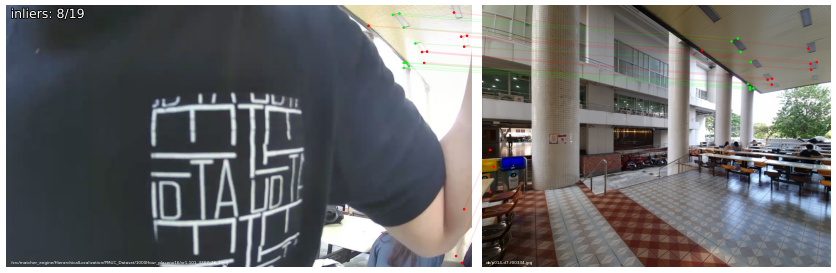

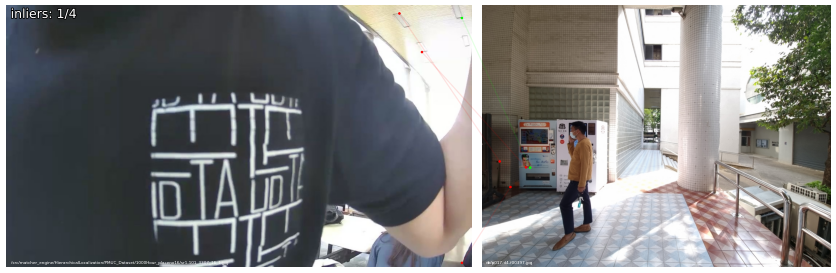

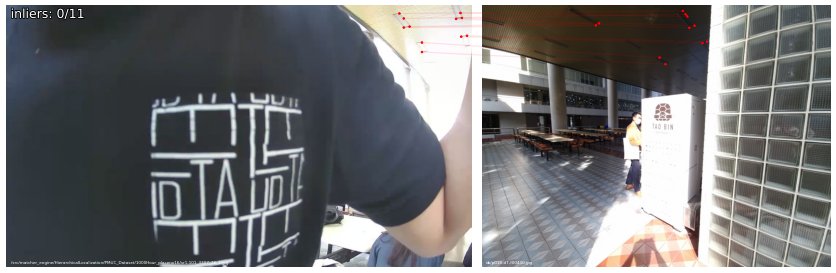

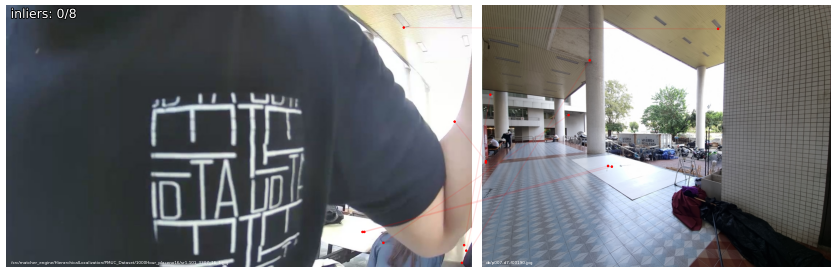

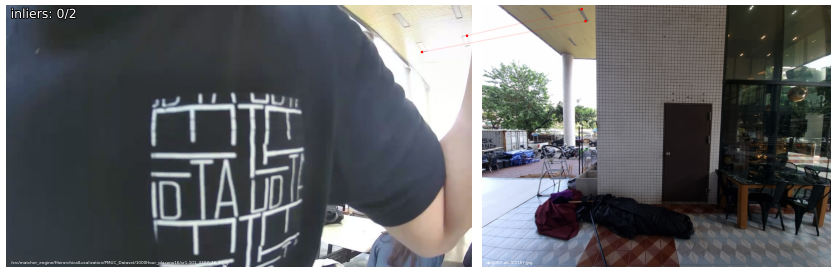

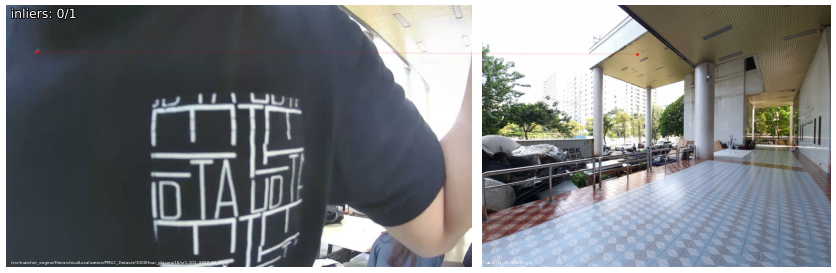

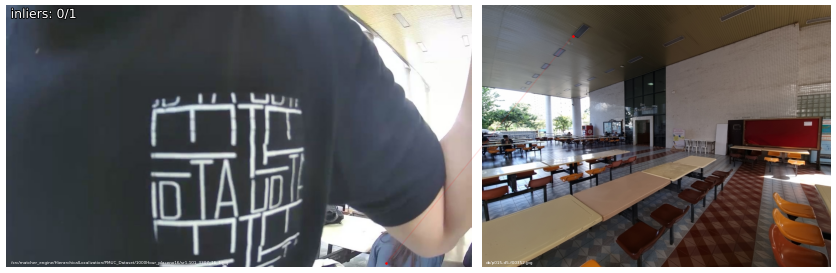

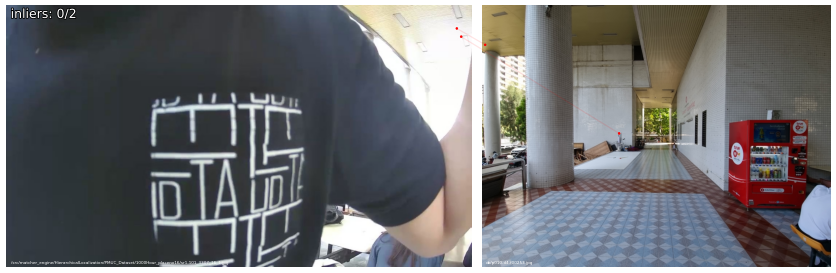

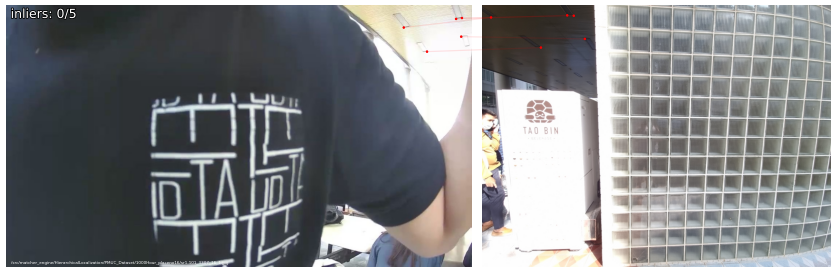

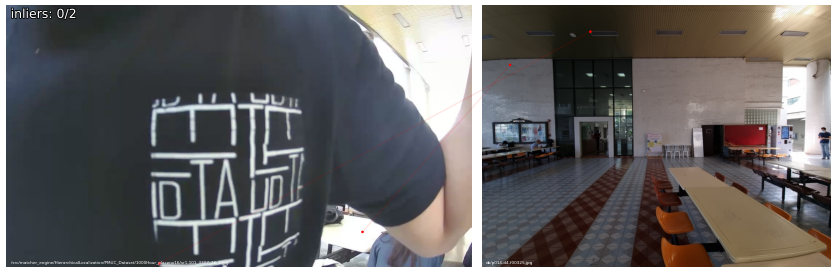

In [54]:
import pycolmap as pc
recon = pc.Reconstruction()
recon.read(f"/src/matcher_engine/HierarchicalLocalization/PMUC_outputs/{dset}/weight{weightNo}/map0/")
# model = 
images  = Path(f"/src/matcher_engine/HierarchicalLocalization/PMUC_Dataset/{dset}/images")
visualization.visualize_loc_from_log(images, full_im_path, logs[0], recon, top_k_db=10, dpi=60)

In [48]:
rets[0]
import numpy as np
tvec = rets[0]['tvec']
qvec = rets[0]['qvec']
qw,qx,qy,qz = qvec
R = np.array([[1 - 2*qy**2 - 2*qz**2, 2*qx*qy - 2*qz*qw, 2*qx*qz + 2*qy*qw],
     [2*qx*qy + 2*qz*qw, 1 - 2*qx**2 - 2*qz**2, 2*qy*qz - 2*qx*qw],
     [2*qx*qz - 2*qy*qw, 2*qy*qz + 2*qx*qw, 1 - 2*qx**2 - 2*qy**2]])
cam_tvec = -1*R.T@tvec
print(cam_tvec)

[ 3.94268566 28.8045335  -0.69845984]


In [49]:
Rt = R.T@Rx180
Rt

array([[ 0.11249469, -0.12928642, -0.98520554],
       [-0.99259821,  0.03103673, -0.1174117 ],
       [ 0.0457573 ,  0.99112146, -0.124838  ]])

In [50]:
rotation_matrix_to_quaternion(Rt)

array([ 0.50465172,  0.54915753, -0.51072988, -0.42767703])

In [42]:
qvec

array([ 0.54915753,  0.50465172, -0.42767703,  0.51072988])

In [ ]:
4.176881677948369,-4.125824096099655,-27.567529561359244,0.7107379571912762,0.650999076254145,-0.16554132592572243,0.20892062687675814

In [10]:
rets[0]

{'success': True,
 'qvec': array([ 0.67654359,  0.64192271, -0.24816743,  0.26198653]),
 'tvec': array([ 22.62053202,  -1.39781981, -18.2574388 ]),
 'num_inliers': 119,
 'inliers': [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  

In [31]:
cam_tvec

array([-4.40730429, 28.7637417 , -0.44640037])

In [17]:
tvec

array([  5.04750919,  -1.73896019, -33.60549336])

In [21]:
images

NameError: name 'images' is not defined

## Localizelol

In [ ]:
loc_pairs = Path(sfm_dir).parent / 'pairs-loc.txt'

In [ ]:
!ls {retrieval_path}

/src/matcher_engine/HierarchicalLocalization/PMUC_outputs/isl2-20221101/weight0/glob-des-netvlad.h5


In [ ]:
dataset_image_dir

'/src/matcher_engine/HierarchicalLocalization/PMUC_Dataset/isl2-20221101/images/'

In [ ]:
desc_path = retrieval.main(retrieval.confs["openibl"], dataset_image_dir, output_dir, "glob-des-netvlad.h5")

100%|██████████| 49/49 [00:01<00:00, 32.65it/s]


In [ ]:
desc_path

PosixPath('/src/matcher_engine/HierarchicalLocalization/PMUC_outputs/isl2-20221101/weight0/glob-des-netvlad.h5')

In [ ]:
references = [i[1].name for i in model.images.items()]
# pairs_from_exhaustive.main(loc_pairs, image_list=[im_path], ref_list=references)
pairs_from_retrieval.main(retrieval_path, loc_pairs, 10, query_list=[im_path], db_prefix="db", query_prefix="q")

references = [i.split(" ")[1] for i in open(loc_pairs, 'r').read().split("\n")]
references

[2023/03/06 05:17:21.523Z hloc INFO] Extracting image pairs from a retrieval database.
[2023/03/06 05:17:21.605Z hloc INFO] Found 10 pairs.


['db/p004-d5-f00127.jpg',
 'db/p001-d1-f00085.jpg',
 'db/p000-d4-f00007.jpg',
 'db/p003-d7-f00118.jpg',
 'db/p005-d4-f00067.jpg',
 'db/p003-d6-f00046.jpg',
 'db/p003-d5-f00115.jpg',
 'db/p000-d3-f00076.jpg',
 'db/p000-d6-f00010.jpg',
 'db/p005-d0-f00061.jpg']

In [ ]:
!cat {loc_pairs}

query/p005-d4-f00213.jpg db/p004-d5-f00127.jpg
query/p005-d4-f00213.jpg db/p001-d1-f00085.jpg
query/p005-d4-f00213.jpg db/p000-d4-f00007.jpg
query/p005-d4-f00213.jpg db/p003-d7-f00118.jpg
query/p005-d4-f00213.jpg db/p005-d4-f00067.jpg
query/p005-d4-f00213.jpg db/p003-d6-f00046.jpg
query/p005-d4-f00213.jpg db/p003-d5-f00115.jpg
query/p005-d4-f00213.jpg db/p000-d3-f00076.jpg
query/p005-d4-f00213.jpg db/p000-d6-f00010.jpg
query/p005-d4-f00213.jpg db/p005-d0-f00061.jpg

In [98]:
def remove_image_from_pairs(db_im_names, inverse=False):
    fd = open(loc_pairs, 'r')
    txt = list(fd.read().split("\n"))
    fd.close()
    new_txt = []
    query_name = txt[0].split(" ")[0]
    for im_name in db_im_names:
        if inverse:
            new_txt.append(f"{query_name} {im_name}")        
        else: 
            txt = list(filter(lambda x: im_name not in x, txt))
    if inverse: txt = new_txt
    references = [i.split(" ")[1] for i in txt]
    file_to_write = '\n'.join(txt)
    print("writing...", file_to_write)
    fd = open(loc_pairs, "w", encoding="utf-8")
    fd.write(file_to_write)
    print("write success!")
    return references

# references = remove_image_from_pairs(["db/p010-d1-f00220.jpg",
# "db/p007-d2-f00175.jpg",
# "db/p010-d0-f00217.jpg",
# "db/p006-d1-f00148.jpg",
# "db/p009-d1-f00292.jpg",
# "db/p009-d0-f00289.jpg",
# "db/p010-d2-f00223.jpg",
# "db/p006-d2-f00151.jpg",
# "db/p006-d0-f00145.jpg",
# "db/p001-d2-f00031.jpg",
# "db/p007-d1-f00172.jpg",
# "db/p002-d2-f00055.jpg",
# "db/p007-d0-f00169.jpg",
# "db/p005-d1-f00124.jpg",
# "db/p000-d0-f00001.jpg",
# # "db/p005-d5-f00136.jpg", #bad

# references = remove_image_from_pairs([
# "db/p002-d0-f00049.jpg",
# "db/p002-d1-f00052.jpg",
# "db/p002-d7-f00070.jpg",
# "db/p001-d0-f00025.jpg", #Bad posse
# "db/p001-d1-f00028.jpg",
# # "db/p001-d7-f00046.jpg",
# # "db/p003-d0-f00073.jpg",
# # "db/p003-d1-f00076.jpg",
# # "db/p008-d0-f00193.jpg",
# # "db/p007-d7-f00190.jpg",
# # "db/p003-d7-f00094.jpg",
# # "db/p007-d0-f00169.jpg",
# # "db/p000-d1-f00004.jpg",
# # "db/p000-d7-f00022.jpg",
# # "db/p006-d0-f00145.jpg",
# # "db/p010-d0-f00217.jpg",
# # "db/p000-d0-f00001.jpg",
# # "db/p006-d7-f00166.jpg",
# # "db/p008-d7-f00214.jpg",
# # "db/p009-d0-f00289.jpg",
# # "db/p007-d1-f00172.jpg",
# ],  inverse=True)

In [182]:
' '.join(references)

'db/p001-d0-f00025.jpg db/p000-d0-f00001.jpg db/p003-d0-f00073.jpg db/p007-d0-f00169.jpg db/p003-d4-f00085.jpg db/p002-d1-f00052.jpg db/p001-d1-f00028.jpg db/p004-d4-f00109.jpg db/p002-d7-f00070.jpg db/p002-d4-f00061.jpg'

In [64]:
feature_path

PosixPath('/src/matcher_engine/HierarchicalLocalization/PMUC_outputs/isl2-20221101/weight0/features.h5')

In [100]:
match_path

PosixPath('/src/matcher_engine/HierarchicalLocalization/PMUC_outputs/isl2-20221101/weight0/features_matches-superglue_pairs-query-netvlad20.h5')

In [30]:
match_features.main(matcher_conf, loc_pairs, features=feature_path, matches=match_path, overwrite=True);

[2023/03/06 05:17:42.652Z hloc INFO] Matching local features with configuration:
{'model': {'name': 'superglue',
           'sinkhorn_iterations': 50,
           'weights': 'outdoor'},
 'output': 'matches-superglue'}


Loaded SuperGlue model ("outdoor" weights)


[2023/03/06 05:17:42.857Z hloc INFO] Start delete query matching: /src/matcher_engine/HierarchicalLocalization/PMUC_outputs/isl2-20221101/weight0/features_matches-superglue_pairs-query-netvlad20.h5
[2023/03/06 05:17:42.858Z hloc INFO] Start skip pairs: /src/matcher_engine/HierarchicalLocalization/PMUC_outputs/isl2-20221101/weight0/features_matches-superglue_pairs-query-netvlad20.h5
[2023/03/06 05:17:42.858Z hloc INFO] Finished setup model for matching
100%|██████████| 10/10 [00:02<00:00,  3.83it/s]
[2023/03/06 05:17:45.469Z hloc INFO] Finished exporting matches.


found 101/985 inlier correspondences.


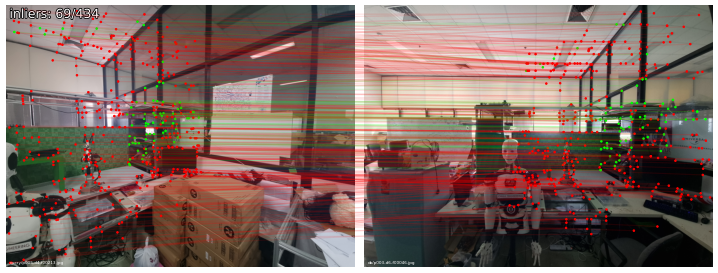

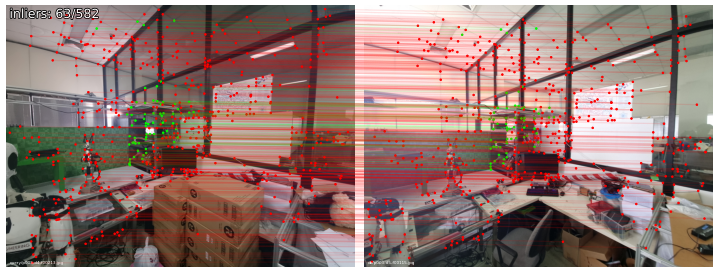

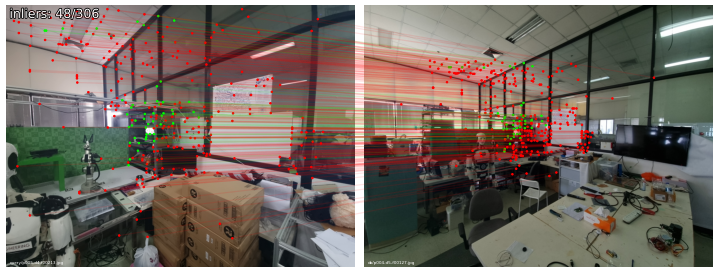

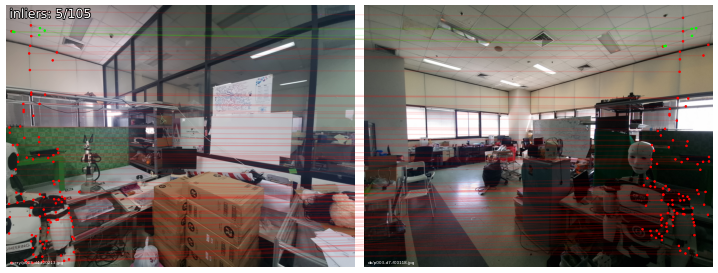

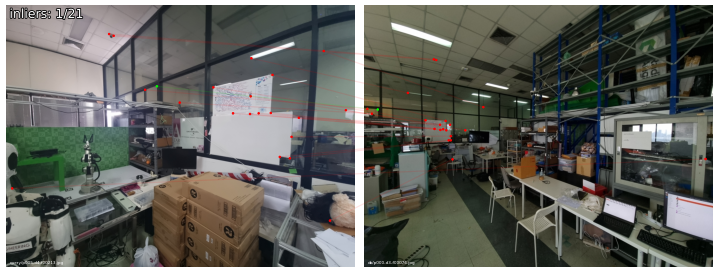

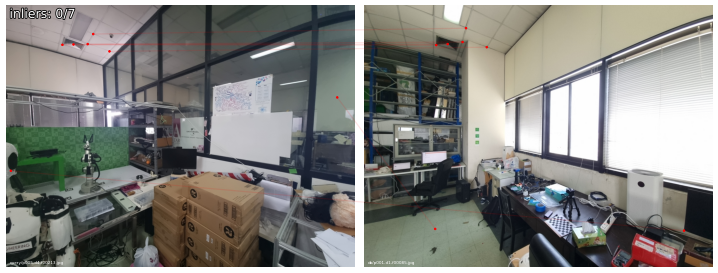

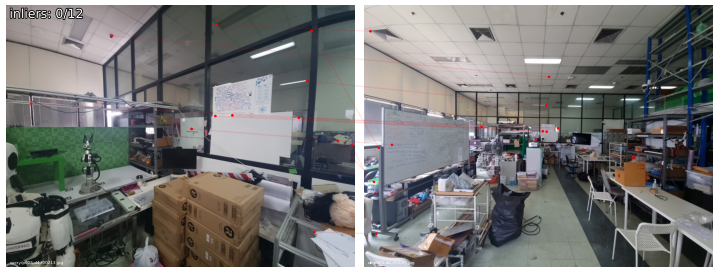

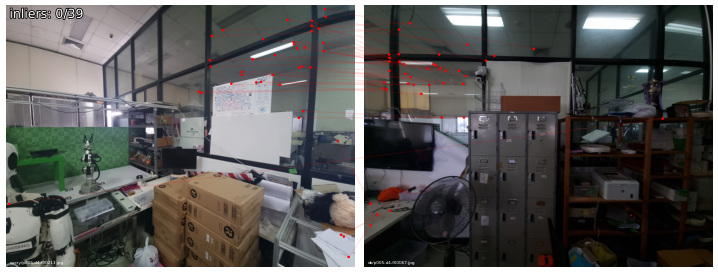

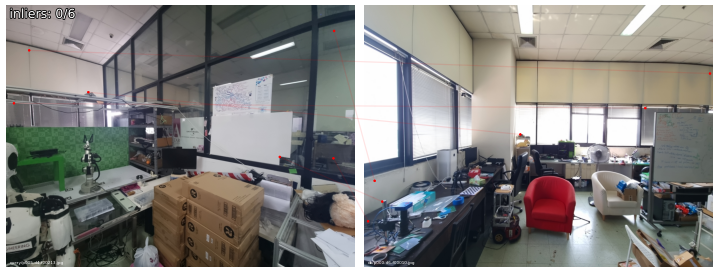

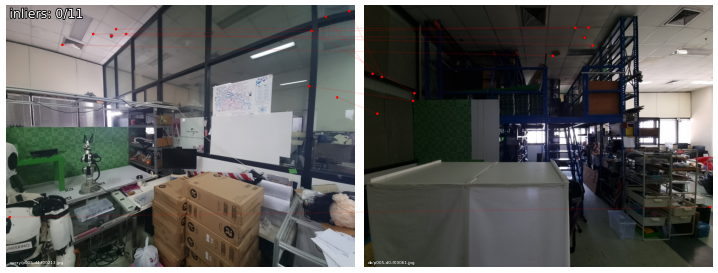

In [31]:
import pycolmap
from hloc.localize_sfm import QueryLocalizer, pose_from_cluster

camera = pycolmap.infer_camera_from_image(full_im_path)
ref_ids = [model.find_image_with_name(r).image_id for r in references]
conf = {
    'estimation': {'ransac': {'max_error': 5, 
                              'min_num_trials':1000, 
                              'max_num_trials':100000, 
                              # 'min_inlier_ratio':0.1, 
                              # 'confidence':0.1
                             }
                  },
    'refinement': {'refine_focal_length': True, 'refine_extra_params': True},
}
localizer = QueryLocalizer(model, conf)
ret, log = pose_from_cluster(localizer, im_path, camera, ref_ids, feature_path, match_path)

print(f'found {ret["num_inliers"]}/{len(ret["inliers"])} inlier correspondences.')
visualization.visualize_loc_from_log(images, im_path, log, model, top_k_db=10, dpi=60)

In [33]:
camera

<Camera 'camera_id=Invalid, model=SIMPLE_RADIAL, width=1008, height=756, num_params=4'>

In [32]:
ret
# log

{'success': True,
 'qvec': array([-0.28676843, -0.29766831,  0.66245873, -0.62474465]),
 'tvec': array([-5.76628286,  0.13221459, -1.35323313]),
 'num_inliers': 101,
 'inliers': [False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  True,
  False,
  False,
  True,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  F

In [85]:
pose = pycolmap.Image(tvec=ret['tvec'], qvec=ret['qvec'])
viz_3d.plot_camera_colmap(fig, pose, camera, color='rgba(0,255,0,0.5)', name=im_path)
fig.show()

NameError: name 'fig' is not defined

In [198]:
im_path

'db/p002-d0-f00049.jpg'

In [ ]:
pose

In [ ]:
image_obj = model.find_image_with_name(im_path)
print(image_obj)
print(image_obj.tvec, image_obj.qvec)


In [ ]:
ret

In [ ]:
ret

In [ ]:
model